In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

In [ ]:
print(X.columns)
print(y.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Index(['num'], dtype='object')


In [ ]:
y_multiclass = y['num']
y_binary = (y['num'] > 0).astype(int)

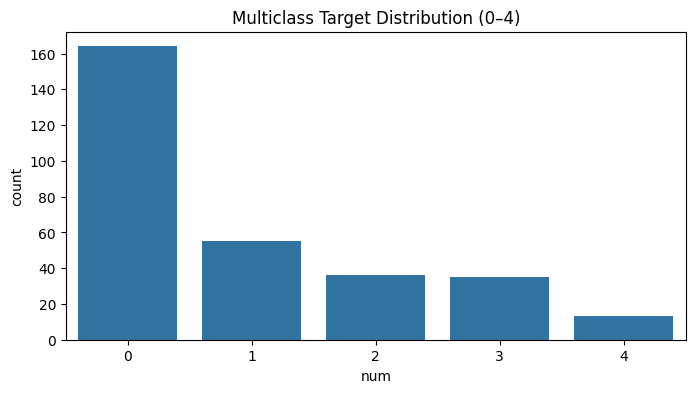

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_multiclass)
plt.title("Multiclass Target Distribution (0–4)")
plt.show()

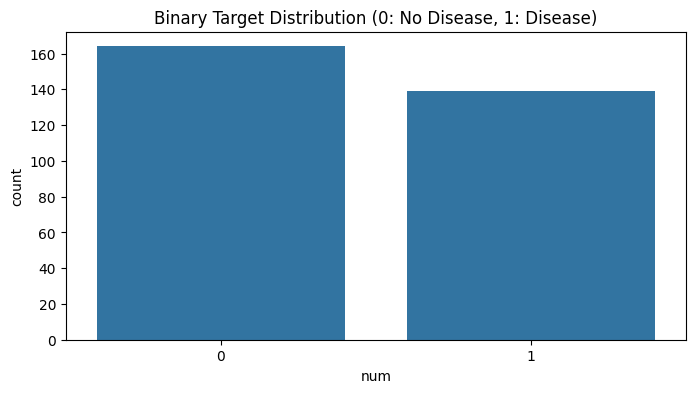

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_binary)
plt.title("Binary Target Distribution (0: No Disease, 1: Disease)")
plt.show()

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

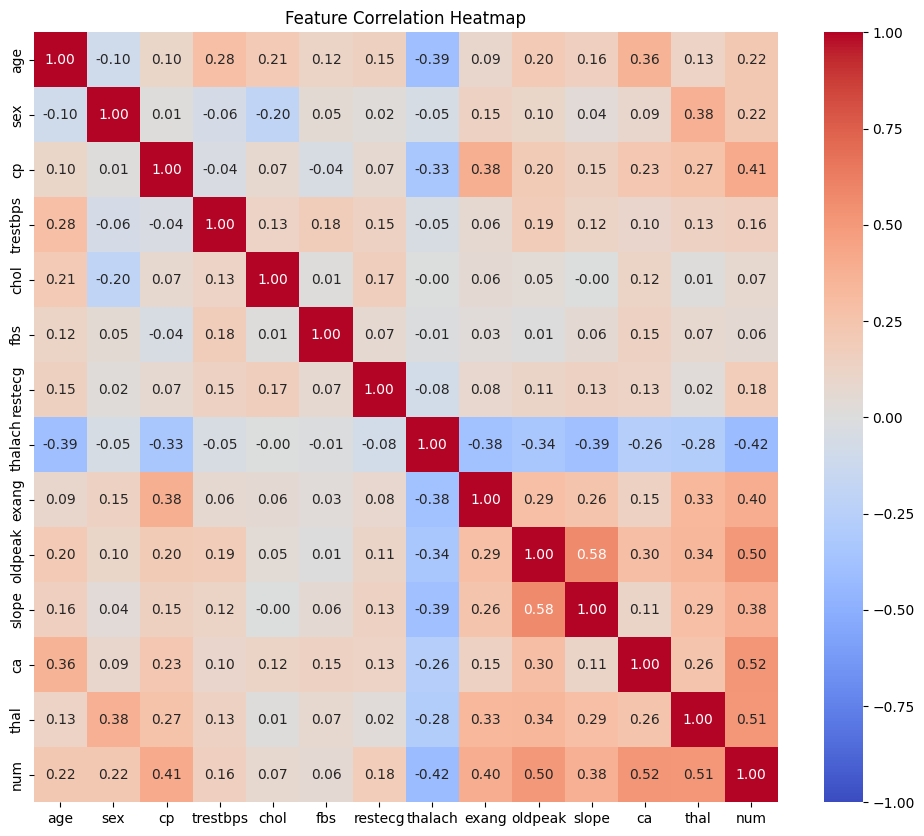

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(pd.concat([X, y_multiclass], axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin = -1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X_train, X_test, y_train_mc, y_test_mc = train_test_split(X_imputed, y_multiclass, test_size=0.2, random_state=42)
_, _, y_train_bin, y_test_bin = train_test_split(X_imputed, y_binary, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


=== BINARY CLASSIFICATION (0: No Disease, 1: Disease) ===

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



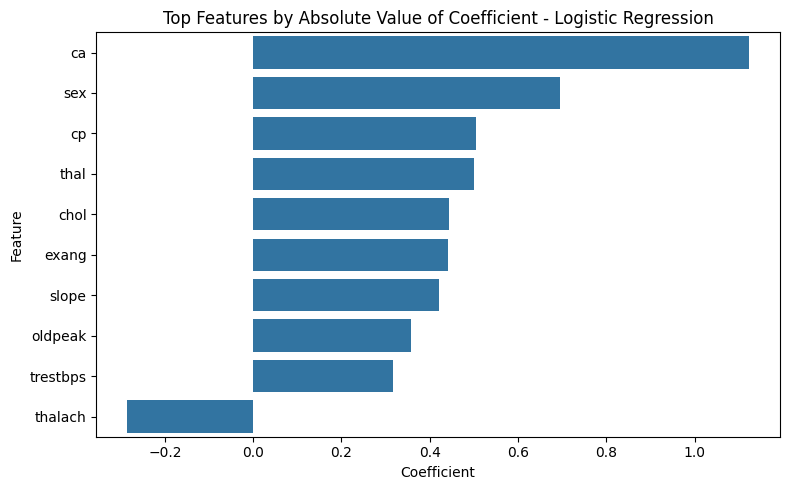


Random Forest Results:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



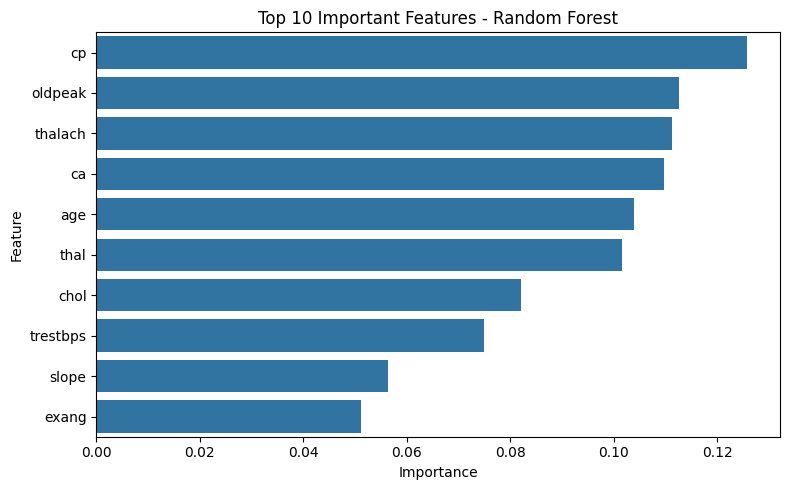


XGBoost Results:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



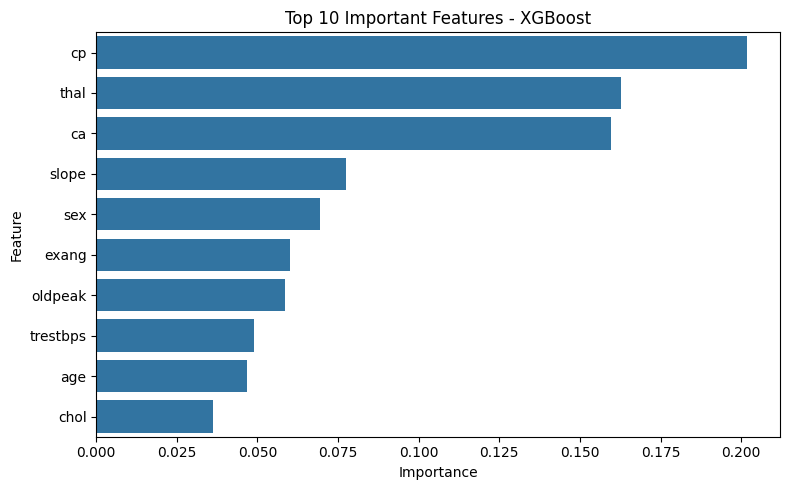

In [ ]:
print("\n=== BINARY CLASSIFICATION (0: No Disease, 1: Disease) ===")
models_bin = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}
feature_names = X.columns

for name, model in models_bin.items():
    model.fit(X_train_scaled, y_train_bin)
    preds = model.predict(X_test_scaled)

    print(f"\n{name} Results:")
    print(classification_report(y_test_bin, preds, zero_division=0))

    # Feature importance for tree models
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        top_n = 10
        indices = np.argsort(importances)[::-1][:top_n]
        top_features = pd.DataFrame({
            "Feature": feature_names[indices],
            "Importance": importances[indices]
        })

        plt.figure(figsize=(8, 5))
        sns.barplot(x="Importance", y="Feature", data=top_features)
        plt.title(f"Top {top_n} Important Features - {name}")
        plt.tight_layout()
        plt.show()

    # Coefficients for Logistic Regression
    if name == "Logistic Regression":
        try:
            coef = model.coef_[0]
            top_n = 10
            indices = np.argsort(np.abs(coef))[::-1][:top_n]
            top_features = pd.DataFrame({
                "Feature": feature_names[indices],
                "Coefficient": coef[indices]
            })

            plt.figure(figsize=(8, 5))
            sns.barplot(x="Coefficient", y="Feature", data=top_features)
            plt.title("Top Features by Absolute Value of Coefficient - Logistic Regression")
            plt.tight_layout()
            plt.show()
        except AttributeError:
            print("Model not fitted properly or coefficients not available.")

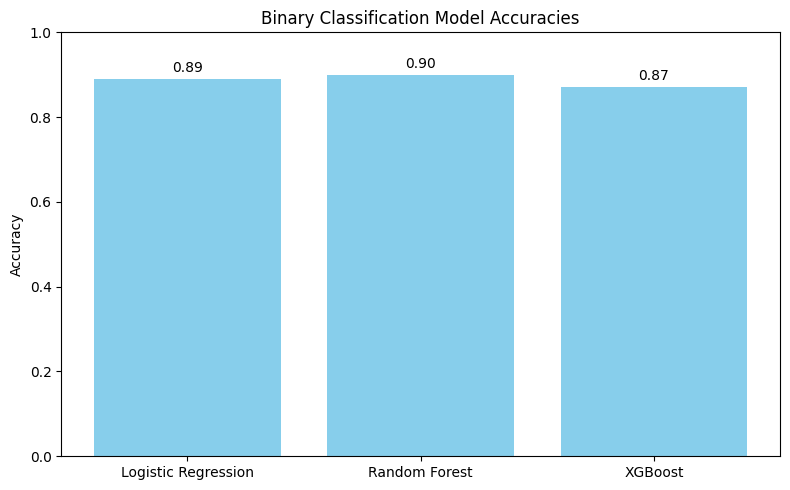

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values you provided
accuracies = {
    "Logistic Regression": 0.89,
    "Random Forest": 0.90,
    "XGBoost": 0.87
}

# Plotting
models = list(accuracies.keys())
scores = list(accuracies.values())
x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(x, scores, color='skyblue')

ax.set_ylabel('Accuracy')
ax.set_title('Binary Classification Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)

# Annotate each bar with the accuracy value
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
print("=== MULTICLASS CLASSIFICATION (0–4) ===")

models_mc = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

for name, model in models_mc.items():
    model.fit(X_train_scaled, y_train_mc)
    preds = model.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print(classification_report(y_test_mc, preds, zero_division=0))


=== MULTICLASS CLASSIFICATION (0–4) ===

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.38      0.25      0.30        12
           2       0.22      0.22      0.22         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.32      0.33      0.32        61
weighted avg       0.51      0.54      0.52        61


Random Forest Results:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.10      0.08      0.09        12
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.19      0.23    

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train_mc)

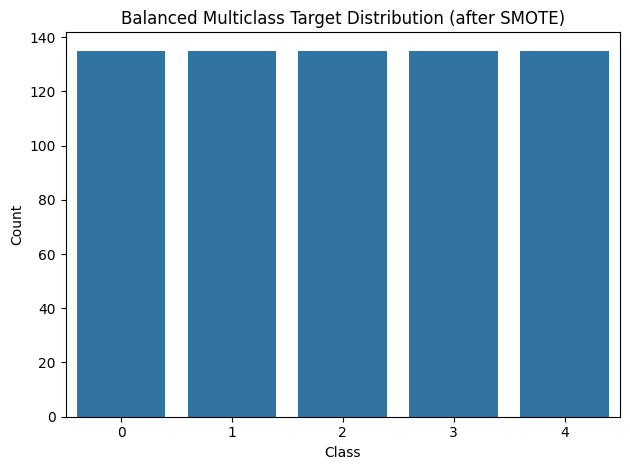

In [ ]:
sns.countplot(x=y_train_bal)
plt.title("Balanced Multiclass Target Distribution (after SMOTE)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
models_mc = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
}

for name, model in models_mc.items():
    model.fit(X_train_bal, y_train_bal)
    preds = model.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print(classification_report(y_test_mc, preds, zero_division=0))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        29
           1       0.08      0.08      0.08        12
           2       0.20      0.22      0.21         9
           3       0.31      0.57      0.40         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.29      0.32      0.30        61
weighted avg       0.50      0.46      0.47        61


Random Forest Results:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.12      0.08      0.10        12
           2       0.25      0.22      0.24         9
           3       0.27      0.43      0.33         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.29      0.33      0.31        61
weighted avg       0.47

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:28:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.00      0.00      0.00        12
           2       0.27      0.33      0.30         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.24      0.27      0.25        61
weighted avg       0.43      0.48      0.45        61



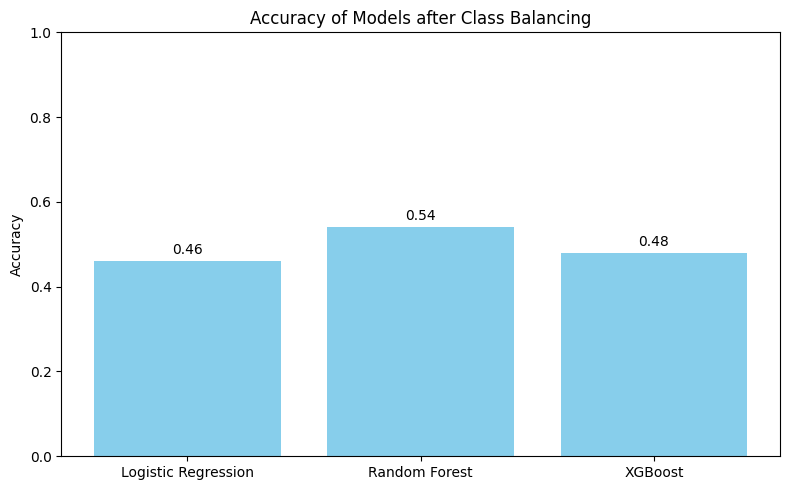

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values you provided
accuracies = {
    "Logistic Regression": 0.46,
    "Random Forest": 0.54,
    "XGBoost": 0.48
}

# Plotting
models = list(accuracies.keys())
scores = list(accuracies.values())
x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(x, scores, color='skyblue')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Models after Class Balancing')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)

# Annotate each bar with the accuracy value
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
